# Welcome to Lab 11: Greedy Algorithms 1 & Hash Tables

In this lab, we will cover greedy algorithms. These are algorithms that at each point in the algorithm make the most optimal decision. Depending on the algorithm and the problem (state-space) this can lead to optimal or suboptimal solutions. This will be demonstrated during the lab. At the end of the lab, we will also practice with some hash tables.

Throughout the exercise, you will be extending the classes by completing code stubs in their respective cells. You do not need to copy the code, it is enough to work in the cell under each exercise. Note that there are separate cells provided where you can (and should) test your code. During the exercises, you will (through customMagics) obtain a Python file (.py) which you should run against a set of unittests. Please avoid writing any unnecessary code in cells containing the `%%execwritefile` command. Doing this could alter the file `.py` and make it syntactically incorrect or interfere with the unittests. To prevent this stick to the following rules:'
 - ***Do not remove cells that start with ``%%execwritefile`` and do not remove that line.***
 - If a cell contains a `%%execwritefile` command at the top and a class definition you need to complete the given methods and adding helper methods is allowed, but do **not** add new functions or Python script to the cells (like global variables).
 - If a cell contains a `%%execwritefile` command at the top and **not** a class definition you must complete the given functions and you are free to add helper functions, new classes, and Python script that contains for example global variables. Note, that the use of global variables is almost always wrong except for a few use cases such as RNG for the numpy random generator methods.
 - If a cell does **not** contain a `%%execwritefile` command you can plot things, print variables, and write test cases. Here, you are free to do whatever you want.
 - If a cell does **not** contain a `%%execwritefile` command it should not contain functional code that is needed to run other functions or classes. The reason is that it is not copied to the `.py`. So, it can not be used during the unittesting.

You do not need to look at the `customMagic.py` nor do more than glimpse at the test file, your exercise is contained in this workbook unless specified differently in this notebook's instructions. 

***Hint: Jupyter Notebooks saves variables between runs. If you get unexpected results try restarting the kernel, this deletes any saved variables.*** 

Please fill in your student name down below

In [1]:
# FILL IN YOU STUDENT NUMBER
student = 3893995

# Set this to false if you want the default screen width.
WIDE_SCREEN = True

In [2]:
from custommagics import CustomMagics
import timeit

if WIDE_SCREEN:
    import notebook
    from IPython.display import display, HTML

    if int(notebook.__version__.split(".")[0]) >= 7:    
        display(HTML(
            '<style>'
                '.jp-Notebook { padding-left: 1% !important; padding-right: 1% !important; width:100% !important; } '
            '</style>'
        ))
    else:
        display(HTML("<style>.container { width:98% !important; }</style>"))

get_ipython().register_magics(CustomMagics)

In [3]:
%%execwritefile exercise11_{student}_notebook.py 0 

# DO NOT CHANGE THIS CELL.
# THESE ARE THE ONLY IMPORTS YOU ARE ALLOWED TO USE:

import numpy as np
import copy
import networkx as nx
import matplotlib.pyplot as plt

RNG = np.random.default_rng()

Writing exercise11_3893995_notebook.py


In [4]:
plt.matplotlib.rcParams['figure.figsize'] = [30, 10]

# 1.0 Fair Splitting Problem

In this exercise, we will have a look at a simple problem where we try to fairly split a list into two list with as close as possible total sum. However, we will implement it in a two ways using greedy algorithms. The basic greedy algorithm we will use works as follows, loop through the input list and at either the value of the list to list1 or list2 depending on the sum of list1 and list2. Before you implement this algorithm think about the following questions: "What is the complexity of this algorithm, and how does it compare to an exhaustive search algorithm?" and "Would this algorithm always find the optimal solution?".

In [5]:
%%execwritefile exercise11_{student}_notebook.py 100 -a -s

def fair_splitting_basic(list_):
    """
    This function solves the fair splitting problem by looping through the `list_`.

    Note that the value should be added to the second list if the sum of both lists is equal.

    :param list_: A list with values
    :type list_: list[int]
    :return:: Two lists with a similar sum.
    :rtype: tuple[list[int]]
    """
    list_ = sorted(list_, reverse=True)
    list1 = []
    list2 = []
    for i in list_:
        if sum(list1) <= sum(list2):
            list1.append(i)
        else:
            list2.append(i)
    return list1, list2


Appending to exercise11_3893995_notebook.py


## Test your code

In the cell below, you can test your `fair_splitting_basic` function.

In [6]:
# Type your testing code here
fair_splitting_basic([1, 2, 4, 16, 25, 3, 5])

([25, 3], [16, 5, 4, 2, 1])

## 1.1 Fair Splitting Problem (Sorted)

In the previous exercise, we implemented the basic greedy algorithm to solve the fair splitting problem. Here, we will try to make sure that the algorithm always returns the optimal solution, assuming the list consists only of positive numbers. We will do this by sorting the list before we loop through it and split it. Why would this guarantee an optimal solution? Does it matter if we sort the list in ascending or descending order? Did this alter the complexity of the algorithm compared to the basic implementation? Would this algorithm still guarantee an optimal solution if negative numbers where also allowed in the list and could you make it work for negative numbers as well?


In [7]:
%%execwritefile exercise11_{student}_notebook.py 110 -a -s

def fair_splitting_sorted(list_):
    """
    This function solves the fair splitting problem by first sorting the `list_`.

    Note that the value should be added to the second list if the sum of both lists is equal.

    :param list_: A list with values
    :type list_: list[int]
    :return:: Two lists with a similar sum.
    :rtype: tuple[list[int]]
    """
    list_ = sorted(list_, reverse=True)
    list1 = []
    list2 = []
    for i in list_:
        if sum(list1) <= sum(list2):
            list1.append(i)
        else:
            list2.append(i)
    return list1, list2
    

Appending to exercise11_3893995_notebook.py


## Test your code

In the cell below, you can test your `fair_splitting_sorted` function.

In [8]:
# Type your testing code here
fair_splitting_sorted([1, 2, 4, 16, 25, 3, 5])

([25, 3], [16, 5, 4, 2, 1])

## 2.0 Flashlight problem

In this problem, we have an unstable bridge that we want to cross at night. At most two people can cross the bridge at the same time and they need to use a flashlight when walking over the bridge. There is only one flashlight and they can not through it back, so at least one person must bring back the flashlight. Each person has a different walking speed and if two people walk together their combined speed is the speed of the slowest person. The input to the problem is a list of the time it takes each person to cross the bridge. What would be an optimal solution to the problem with the following input `[1,5,2,10]`? Make a greedy pseudo algorithm to solve the general problem and check if this is similar to the optimal problem for the previous example. What would be the complexity of this greedy algorithm?

In [9]:
%%execwritefile exercise11_{student}_notebook.py 200 -a -s

def flashlight_problem(crossing_time):
    """
    This function solves the flashlight problem and calculates the total time it takes to cross the bridge.

    :param crossing_time: A list of the time it takes each person to cross the bridge.
    :type crossing_time: list[int]
    :return: The total time it takes for the group to cross the bridge
    :rtype: int
    """

    crossing_time.sort()
    total_time = 0

    while len(crossing_time) > 3:
        # Two fastest cross, first fastest returns, two slowest cross, second fastest returns
        total_time += crossing_time[1] * 2 + crossing_time[0] + crossing_time[-1]
        crossing_time = crossing_time[:-2]  # remove two slowest

    if len(crossing_time) == 3:
        total_time += crossing_time[0] + crossing_time[1] + crossing_time[2]
    elif len(crossing_time) == 2:
        total_time += crossing_time[1]
    else:  # len(crossing_time) == 1
        total_time += crossing_time[0]

    return total_time


Appending to exercise11_3893995_notebook.py


## Test your code

In the cell below, you can test your `flashlight_problem` function.

In [10]:
# Type your testing code here
flashlight_problem([1,5,2,10])

17

# 3.0 Maximum Path Sum (Greedy)

In exercise 2.0 of lab 9, we solved the maximum path sum problem. However, even after using dynamic programming it still had a complexity of $O(n^2)$. We can reduce this complexity even further by using a greedy algorithm. Try to find a greedy solution of $O(n)$. What would be a possible downside of such a greedy algorithm? 

### Below you find the explanation of lab 9 exercise 2.0:

----------------------------------------------
 
In this exercise, we will solve a more general version of one of the [euler project](https://projecteuler.net/problem=18) problems. In this problem, we have a triangle of numbers where paths exist from the top of the triangle to the bottom of the triangle. Your job is to find the path with the smallest sum. Below, you can see a screenshot of the example in the Euler problem.

<img src="path_sum.png" alt="drawing"/>

A good way to solve this problem is by using top-down dynamic programming. Think about what the recurrence relation is for this problem. We will generate a random triangle of numbers as a triangle object that contains the top node. Each Node then contains two other nodes that are the lower left and lower right node. Note, that this triangle object is not a binary tree but a graph as, from a tree datastructure point of view, parents share the same children. In the `Node` object, we will call it `left` and `right` referring to the lower left and lower right nodes.

Before, you start solving this problem check how the `Node` and `Triangle` classes work and implement a representation for the `Triangle` class. If you want you can skip this step but it is a good recursion problem to solve.

----------------------------------------------

***Implement, your greedy algorithm below!***

In [11]:
%%execwritefile exercise11_{student}_notebook.py 300 -a -s

class Node():
    def __init__(self, value, left=None, right=None):
        """
        This creates a node object containing the value and its lower right and left node.

        :param value: The value of the node
        :type value: int
        :param left: The lower left node, defaults to None
        :type left: Node
        :param right: The lower right
        :type right: Node        
        """
        self.value = value
        self.left = left
        self.right = right

    def __lt__(self, other):
        """
        This makes the use of lesser than and higher than between nodes possible.
        """
        return self.value < other.value

    def __repr__(self):
        """
        This is the representation of the Node.
        You can adjust it to your own preference.
        """
        return f"Node({self.value})"

class Triangle():
    """
    This class has one object attribute:
        :param top: The top node of the triangle
        :type top: Node
    """
    
    def __init__(self, min_=1, max_=100, height=10):
        """
        This creates a random triangle object as explained above.

        :param min: The minimum value that can be generated as value for a node
        :type min: int
        :param max: The maximum value that can be generated as value for a node
        :type max: int
        :param depth: The height of the triangle.
        :type depth: int
        """
        # Initialize all nodes
        rows = []
        for row in range(1, height+1):
            rows.append([Node(RNG.integers(min_, max_)) for _ in range(row)])

        # Connect all nodes
        for i, row in enumerate(rows[:-1]):
            for j, cell in enumerate(row):
                cell.right = rows[i+1][j+1]
                cell.left  = rows[i+1][j]

        self.top = rows[0][0]
        self.height = height

    def show(self, path=None):
        """
        This method shows the current triangle.
        """
        graph = nx.Graph()

        pos = {}
        row = [self.top]
        for i in range(self.height):
            for j, node in enumerate(row):
                if node.left is not None:
                    graph.add_edge(node, node.left)
                    graph.add_edge(node, node.right)
                    
                graph.add_node(node)
                pos[node] = (j * 2 + (self.height-i), -i)
                
            row = [row[0].left] + [n.right for n in row]
            
        nx.draw_networkx(graph, 
                         pos,
                         labels = {node: node.value for node in pos},
                         node_color="w",
                         with_labels=True,
                         node_size=600,
                         width=1)
        
        if path is not None:
            edgelist = [(node, path[i+1]) for i, node in enumerate(path[:-1])]
            nx.draw_networkx_edges(graph, 
                                   pos, 
                                   edgelist,
                                   edge_color='r',
                                   width=4)
        plt.show()

Appending to exercise11_3893995_notebook.py


In [12]:
%%execwritefile exercise11_{student}_notebook.py 310 -a -s

def greedy_path_sum(triangle):
    """
    This function finds the maximum sum path in the triangle using a greedy algorithm.

    Note that you always take the right node if the left node and right node are equal.

    :param triangle: The triangle for which you need to calculate the maximum path sum
    :type triangle: Triangle
    :return: The sum of the path from the top node of the triangle and the path that gives this sum
    :rtype: int, list[Node]
    """
    path = [triangle.top]
    total = triangle.top.value
    current = triangle.top

    while current.left is not None:
        if current.left.value == current.right.value:
            path.append(current.right)
            total += current.right.value
            current = current.right
        elif current.left.value > current.right.value:
            path.append(current.left)
            total += current.left.value
            current = current.left
        else:
            path.append(current.right)
            total += current.right.value
            current = current.right

    return total, path


Appending to exercise11_3893995_notebook.py


## Test your code

In the cell below, you can test your code for the `greedy_path_sum` class.

The maximum value in the triangle is 1059 consisting of the values: [Node(35), Node(14), Node(71), Node(70), Node(98), Node(97), Node(83), Node(57), Node(69), Node(78), Node(66), Node(61), Node(72), Node(93), Node(95)]


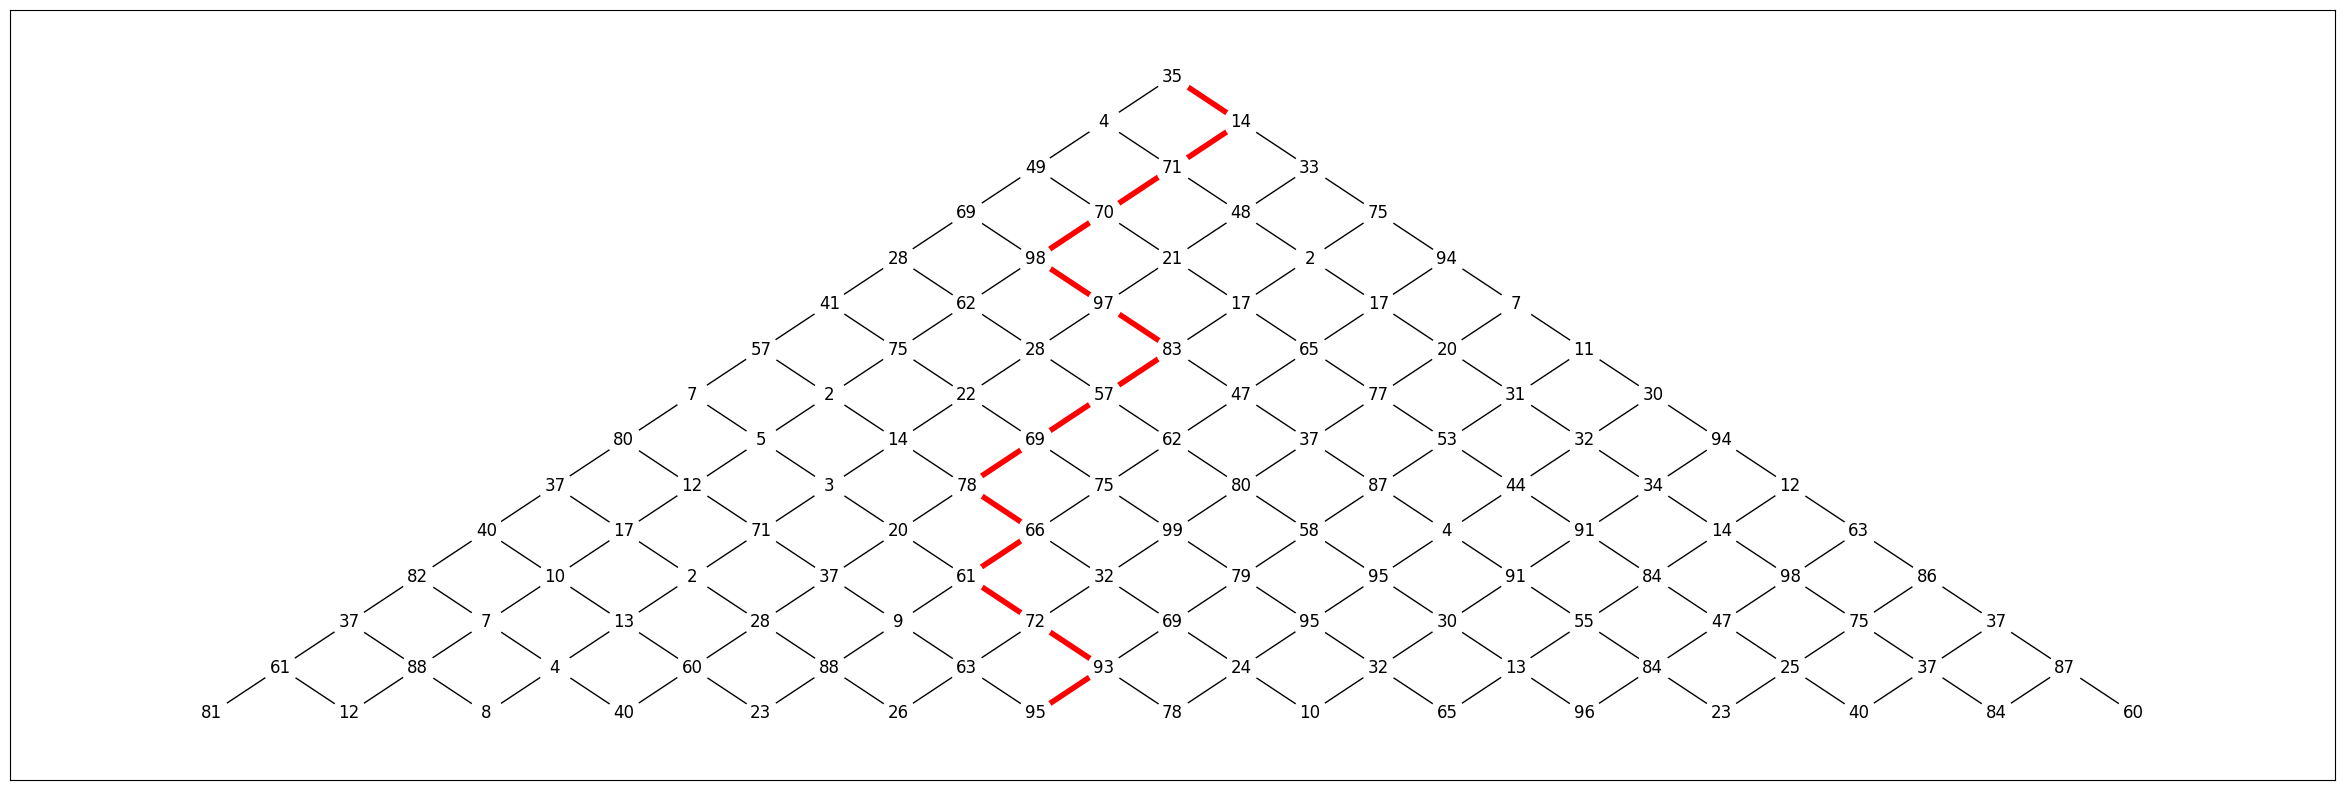

In [13]:
triangle = Triangle(height=15)
value, path = greedy_path_sum(triangle)
print(f"The maximum value in the triangle is {value} consisting of the values: {path}")
triangle.show(path)

# 4.0 Knapsack Problem

Last, week we saw how to solve the knapsack problem in polynomial time. This week, we will make a greedy algorithm to solve the problem reducing the complexity even further. Make a pseudo-algorithm to solve the knapsack problem using a greedy algorithm. What is the complexity of this algorithm? And does it always find the optimal solution?

In [14]:
%%execwritefile exercise11_{student}_notebook.py 400 -a -s

def knapsack_problem(max_weight, items):
    """
    This function solves the knapsack problem and returns the value you can fit in the knapsack given the max weight and the items.
    It also returns which items lead to this value.

    :param max_weight: The maximum weight that is allowed in the knapsack.
    :type max_weight: int
    :param items: The items set you can choose from. Each item has a weight and value represented by a (weight, value) pair.
    :type items: list[tuple[int]]
    :return: The total value in the knapsack and the items that are added (by index).
    :rtype: int, list[int]
    """ 
    n = len(items)
    K = np.zeros((n + 1, max_weight + 1))

    for i in range(1, n + 1):
        for w in range(1, max_weight + 1):
            weight, value = items[i - 1]
            if weight <= w:
                K[i][w] = max(value + K[i - 1][w - weight], K[i - 1][w])
            else:
                K[i][w] = K[i - 1][w]

    result = K[n][max_weight]
    total_weight = max_weight
    taken = []

    for i in range(n, 0, -1):
        if result <= 0:
            break
        if result == K[i - 1][total_weight]:
            continue
        else:
            taken.append(i - 1)
            result -= items[i - 1][1]
            total_weight -= items[i - 1][0]

    return int(K[n][max_weight]), taken


Appending to exercise11_3893995_notebook.py


## Test your code

In the cell below, you can test your `knapsack_problem` function. Compare it to the `knapsack` algorithm of previous lab, does it give the same result?

In [15]:
# Type your testing code here
number_of_items = RNG.integers(2,11)
max_weight = 8
items = [(RNG.integers(1,5), RNG.integers(10,21)) for i in range(number_of_items)]
print(items)
knapsack_problem(max_weight, items)

[(2, 10), (4, 17), (1, 13), (3, 20), (4, 17)]


(50, [3, 2, 1])

# 5.0 Hash Tables

In this exercise, we will practice making hash tables to recreate a simplified version of the native Python `set` datastructure. As you have learned in the lecture, a hashtable consists of a list of `M` "buckets", where a bucket is a list of items. Suppose we have `N` items in our set. Ideally, these `N` items are spread evenly across the `M` buckets, leading to an `N/M` runtime to add, find, or delete an item. For example, if we have 460 items and 20 buckets and the items are spread out evenly, then checking to see if a given item is in the set means iterating over a list of only 23 items since each list contains 23 items.

Let's try building a set called `IntegerSet` that is based on this principle that works for integers. Suppose `M=10`. In this case, we'd use modulus 10 to give each integer an index between 0 and 10. In this example, 3 and 13 are in the same place in the array (therefore in the same bucket) because they have the same hash function output.

You have to implement three methods similar to the native `set` datastructure: `add`, `__contains__`, and `remove`. Furthermore, we also need a method to calculate where a value needs to be placed in the array, which is done with the `get_bucket_number` method. 

In [16]:
%%execwritefile exercise11_{student}_notebook.py 500 -a -s

class IntegerSet():
    def __init__(self, M):
        """
        This initialized the hashtable. This should include making an array of the proper length and object type.

        :param M: The number of buckets in the hashtable.
        :type size: int
        """        
        self.M = M
        self.hash_table = np.empty(M, dtype=object)  # make an empty array of type object. This can now be any Python object
        self.hash_table[...] = [[] for _ in range(M)]  # fill each element of the array with an empty lists

    def get_bucket_number(self, value):
        """
        This is the function that determines which bucket to use.

        :param value: The integer for which we want to know the bucket number. The result is just the value mod the number of buckets.
        :type value: int
        :return: The index in the hash table of the value.
        :rtype: int
        """
        return value % self.M
    
    def add(self, value):
        """
        This method adds a value to the IntegerSet.
        Note, that the value should be placed at the right index.
        If the index already contains elements then it should be added to the end of the list.

        Important, because we are making a set, you should check if the value is already in the list of the correct index.
        If so, you should not add it again.
        
        :param value: The integer that we want to add to the set.
        :type value: int
        """
        bucket_number = self.get_bucket_number(value)
        if value not in self.hash_table[bucket_number]:
            self.hash_table[bucket_number].append(value)

    def __contains__(self, value):
        """
        This method checks if a value is in a list.
        This magic/dunder method is called in the following syntax: `value in integer_set`, 
        where integer_set is an object of this class.
        
        Note, that this is essentially a search method.

        :param value: The integer that we are searching in the set.
        :type value: int
        :return: This returns if the value is found or not
        :rtype: bool
        """
        bucket_number = self.get_bucket_number(value)
        return value in self.hash_table[bucket_number]

    def remove(self, value):
        """
        This method removes value from the set.

        :param value: The integer that we are deleting from the set.
        :type value: int
        """
        bucket_number = self.get_bucket_number(value)
        if value in self.hash_table[bucket_number]:
            self.hash_table[bucket_number].remove(value)
        
    def __repr__(self):
        """
        Representation of the IntegerSet.
        Currently, it shows the hash table, where each row is an index in the table.
        You can change it to anything you like, for example, you could represent it as a set of integers.
        """
        return "[" + ",\n ".join(map(repr, self.hash_table)) + "]"

Appending to exercise11_3893995_notebook.py


## Test your code

In the cell below, you can test your `IntegerSet` class. 

***Make, sure that all methods work. In the example below we only add some values.***

In [17]:
integer_list = IntegerSet(10)
for value in RNG.integers(15, size=15):
    print(f"Adding {value} to the set.")
    integer_list.add(value)
integer_list

Adding 9 to the set.
Adding 4 to the set.
Adding 0 to the set.
Adding 14 to the set.
Adding 12 to the set.
Adding 6 to the set.
Adding 6 to the set.
Adding 12 to the set.
Adding 3 to the set.
Adding 4 to the set.
Adding 1 to the set.
Adding 4 to the set.
Adding 4 to the set.
Adding 7 to the set.
Adding 7 to the set.


[[0],
 [1],
 [12],
 [3],
 [4, 14],
 [],
 [6],
 [7],
 [],
 [9]]

## 5.1 Hash Tables (Strings)

Above we build a data structure that could only store integers. Let's modify the data structure so that it can store any type, e.g. strings. 

We only need to change the `get_bucket_number` function to make this work. Therefore, we will inherit (hear copy-paste) the previous class and overwrite the `get_bucket_number` function. 

Converting arbitrary data types to a bucket number is challenging. For example, how would you know which bucket number should contain put the word "cat"? We discussed some ways to do this in lecture. Luckily, your data structure doesn't have to do this work! Converting objects into integers is so important (because of hash tables) that there is a built-in function called `hash` that is defined for a bunch of different types, e.g. strings. That is, the `hash` function of Python will turn any object into an integer if this object has a hash function implemented. Such an object is called "hashable".

In fact, if you can use an object in a "normal" `set` or `dict` than it has a `hash` function defined. 

***Now, adjust the `get_bucket_number` such that it works for any hashable object.*** Hint: The code is very simple.

In [18]:
%%execwritefile exercise11_{student}_notebook.py 510 -a -s

class Set(IntegerSet):
    def get_bucket_number(self, item):
        """
        This is the hash function that is used to calculate the index in the hash table given a value.

        :param item: The hashable object for which we want to know the index in the hash table.
        :type item: object 
        :return: The index in the hash table of the item of type object.
        :rtype: int
        """
        return hash(item) % self.M


Appending to exercise11_3893995_notebook.py


## Test your code

In the cell below, you can test your `Set` class. 

***Note, that the example below adds some random character to the set, however, make sure that other hashable objects such as strings, int, or tuples also work.***

In [19]:
integer_list = Set(10)
for value in RNG.integers(65, 123, size=25):
    value = chr(value)  # This turns an integer into an ASCII character.
    print(f"Adding {value} to the set.")
    integer_list.add(value)
integer_list

Adding ] to the set.
Adding j to the set.
Adding r to the set.
Adding W to the set.
Adding l to the set.
Adding i to the set.
Adding t to the set.
Adding ^ to the set.
Adding ^ to the set.
Adding n to the set.
Adding L to the set.
Adding f to the set.
Adding u to the set.
Adding a to the set.
Adding j to the set.
Adding c to the set.
Adding a to the set.
Adding F to the set.
Adding C to the set.
Adding g to the set.
Adding f to the set.
Adding r to the set.
Adding a to the set.
Adding R to the set.
Adding U to the set.


[['r', 'u'],
 [],
 ['l', 'i', '^', 'U'],
 ['j', 'n'],
 ['t'],
 [],
 ['R'],
 [']', 'a', 'C'],
 ['W', 'f', 'c', 'F', 'g'],
 ['L']]

# 6.0 UNITTESTS

During this assignment, we copied all your code to the following **.py** file **"exercise11_{student}_notebook.py"**. You also tested your code along the way. However, it is possible that there are still a few errors. Therefore, it is good to run some unittest when you complete all coding. This gives you an extra chance to spot mistakes. Here, we added some unittest for you to use. Note, that they are merely a check to see if your **.py** is correct.

From this point onwards we strongly advise renaming the **"exercise11_{student}_notebook.py"** file to the correct file name that you need to hand in **"exercise11_{student}.py"**. Now, you can adjust the **"exercise11_{student}.py"** file without the risk of overwriting it when you run the notebook again. This also enables the possibility to run the unittests. Note, that from now on if you make a change in the Python file and you want to go back to the notebook later that you also make this change in the notebook. To run the unittests go to the **"unit_test.py"** file and run the file in either PyCharm, VSCode, or a terminal. You can run it in a terminal using the following command: `python -m unittest --verbose unit_test.py`. `--verbose` is optional but gives you more details about which tests fail and which succeed.

You are allowed to add your own unittests. 

## Uploading to Brightspace for Bonus

Next, you can upload your Python file with the correct name on brightspace in the bonus assignment. Follow the instructions on this brightspace page carefully to have a successful submission. After you get the feedback for this exercise you can either continue working in the Python file to fix possible bugs or you can go back to the notebook and remake the Python file. ***Please be careful, do not update your code in both the Python file and notebook at the same time!***. If you go back to the notebook do not forget to update the notebook with any changes you made within the Python file. In this case, it is best to just delete the Python file as soon as you copied all changes.